In [10]:
# import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [30]:
# setting
plt.rcParams['font.family']= 'sans-serif'
plt.rcParams['font.sans-serif'] = ['Arial']

In [25]:
# Fig. 1b
file_path = "../data/Figure_1/ChIP_wt_ldl3_atx345.rpkm.tsv"
df_chip = pd.read_csv(file_path, sep="\t", index_col=0)

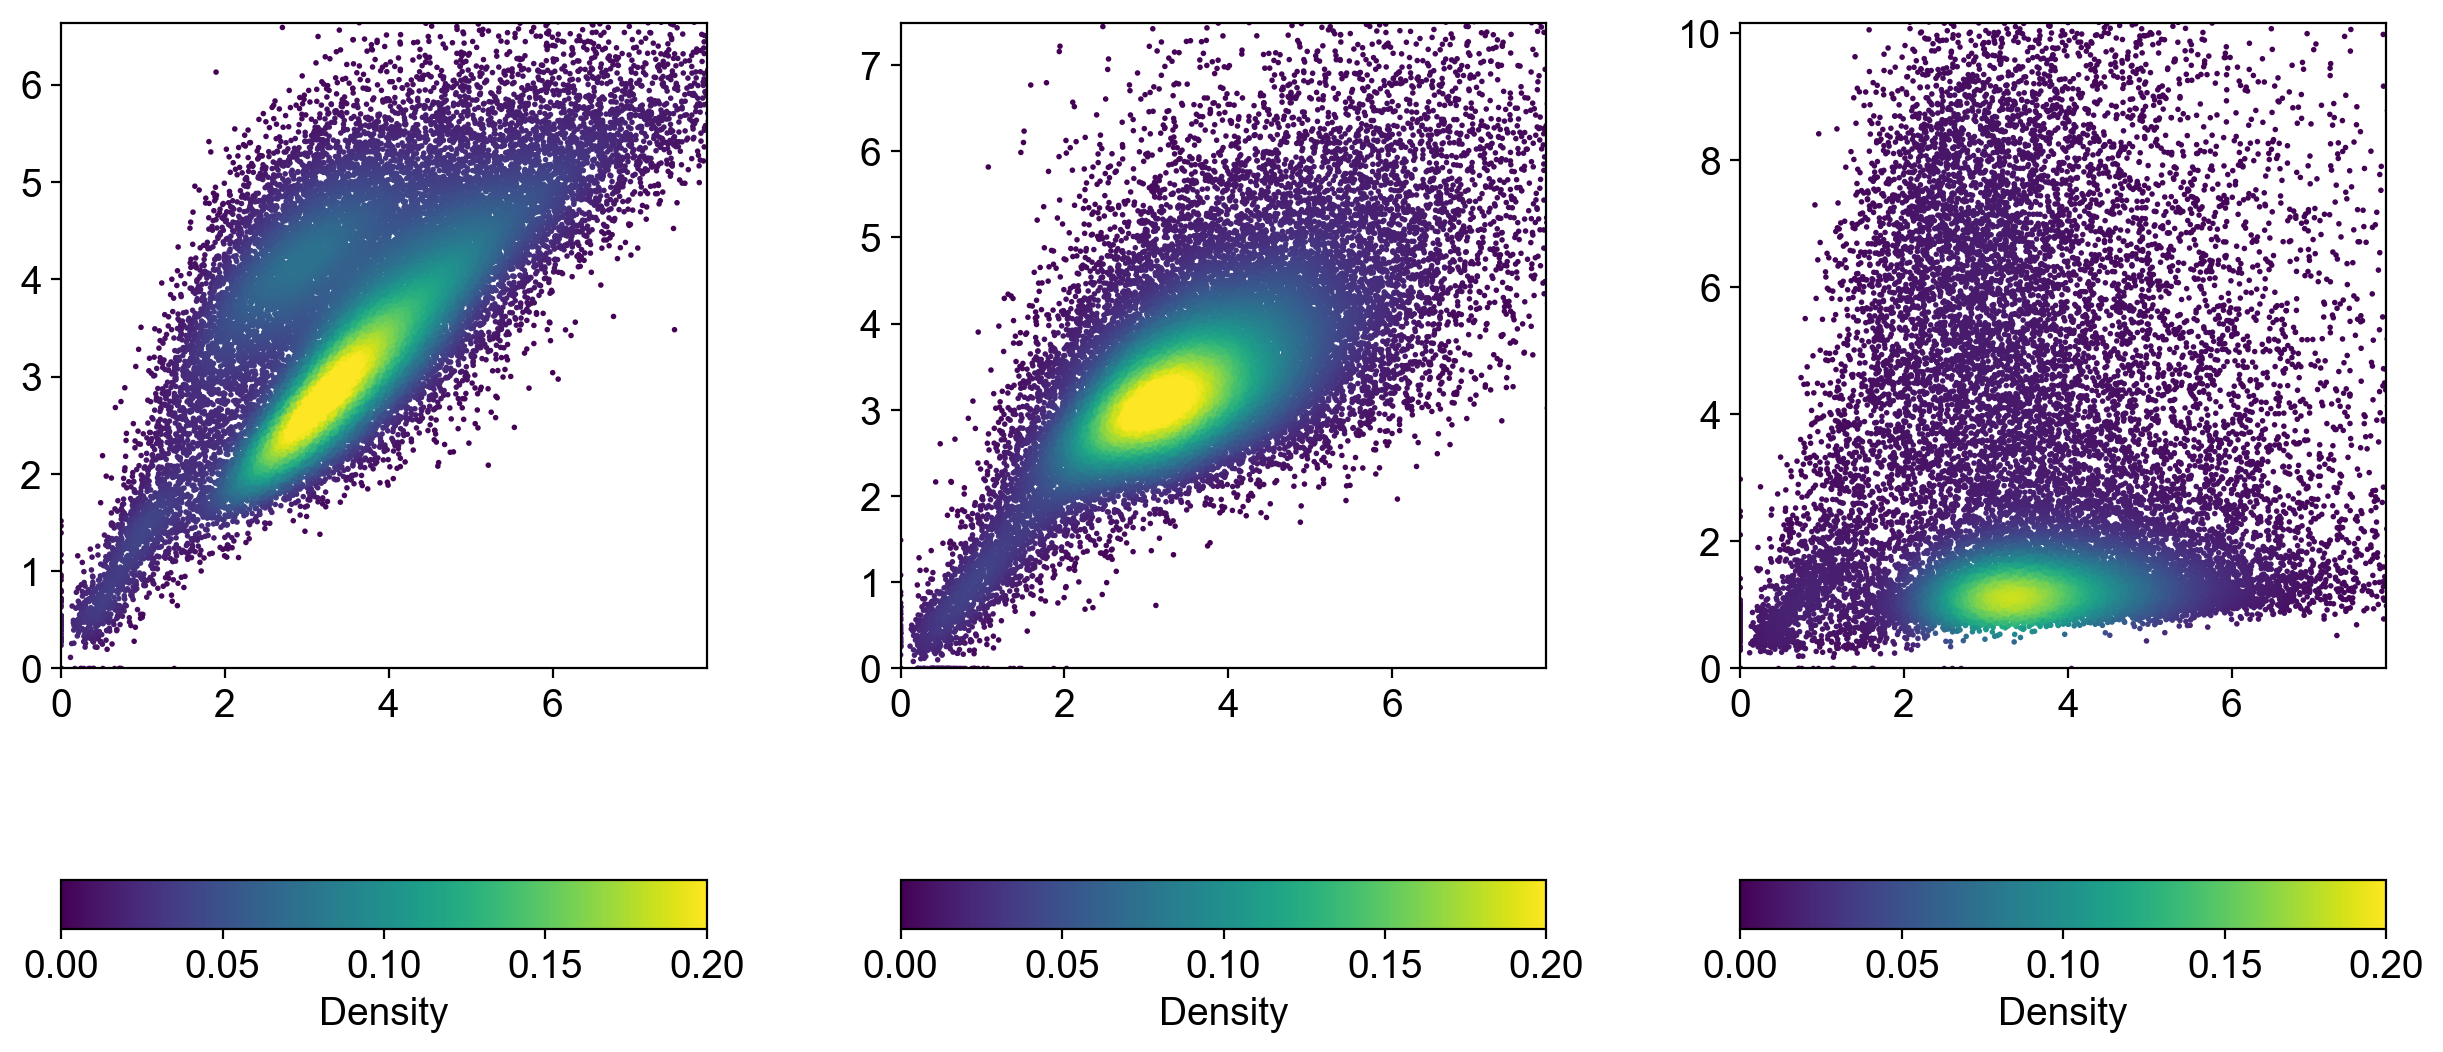

In [39]:
hm_list = ["H2A.Z","H2Aub","H3K27me3"]

fig,ax = plt.subplots(1,3,figsize=(15,7),dpi=200,
                      gridspec_kw=dict(wspace=0.3))

for i in range(len(hm_list)):
    x = np.sqrt(df_chip[f"H3K4me2_WT"])
    y = np.sqrt(df_chip[f"{hm_list[i]}_WT"])

    # calculate KDE
    data = np.vstack([x,y])
    kde = gaussian_kde(data)
    density = kde(data)

    # plot
    sc = ax[i].scatter(x, y, c=density, s=1, cmap='viridis', vmin=0, vmax=0.2)

    # color bar
    divider = make_axes_locatable(ax[i])
    cax = divider.append_axes("bottom", size="5%", pad=0.2)
    fig.colorbar(sc, label='Density', cax=cax, orientation='horizontal')

    # format figure
    ax[i].set_xlim(0,np.percentile(x,99))
    ax[i].set_ylim(0,np.percentile(y,99))
    ax[i].set_xlabel(f"H3K4me2")
    ax[i].set_ylabel(f"{hm_list[i]}")
    ax[i].set_box_aspect(1)

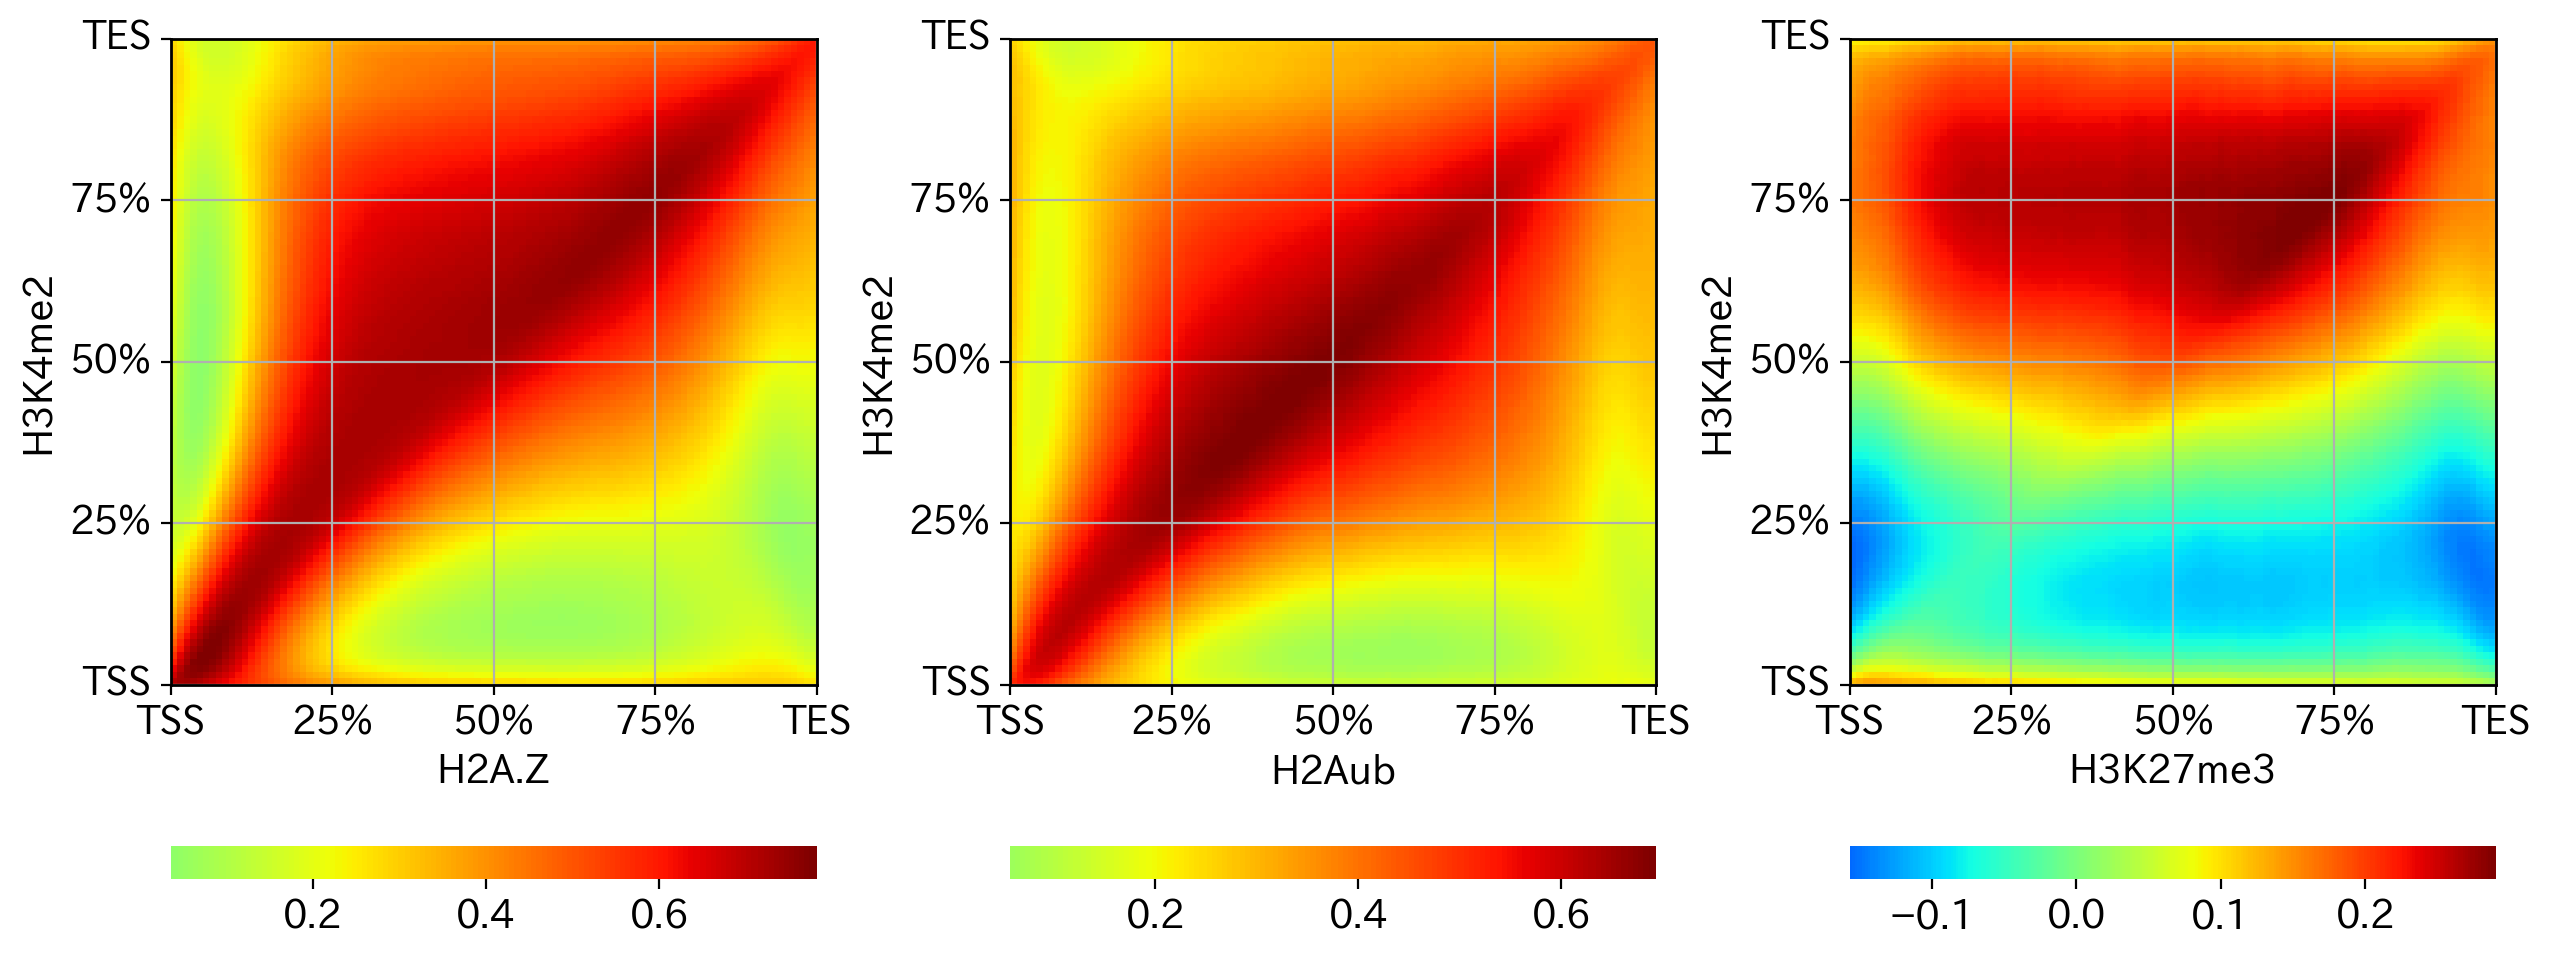

In [14]:
# Figure 1c
hm_list = ["H2A.Z","H2Aub","H3K27me3",]

fig,ax = plt.subplots(1,3,figsize=(15,7),dpi=200,
                      gridspec_kw=dict(wspace=0.3))

for i in range(3):
    hm1 = "H3K4me2"
    hm2 = hm_list[i]
    df_r = pd.read_csv(f"../data/Figure_1/spearmanr_per_bins_{hm1}_{hm2}.csv",
                       header=None)

    # plot
    df_r = df_r.iloc[::-1,:]
    sns.heatmap(df_r,cmap="jet",ax=ax[i],center=0,
                cbar=True,cbar_kws={"orientation":"horizontal"})

    # format figure 
    ax[i].set_xlabel(hm2)
    ax[i].set_ylabel(hm1)
    ax[i].set_aspect('equal', adjustable='box')
    ax[i].set_xticks(np.arange(0,101,25))
    ax[i].set_yticks(np.arange(0,101,25))
    ax[i].set_xticklabels(["TSS","25%","50%","75%","TES"],rotation=0)
    ax[i].set_yticklabels(["TES","75%","50%","25%","TSS"],rotation=0)
    ax[i].grid()
    for spine in ax[i].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1)

Text(0, 0.5, 'Number of genes')

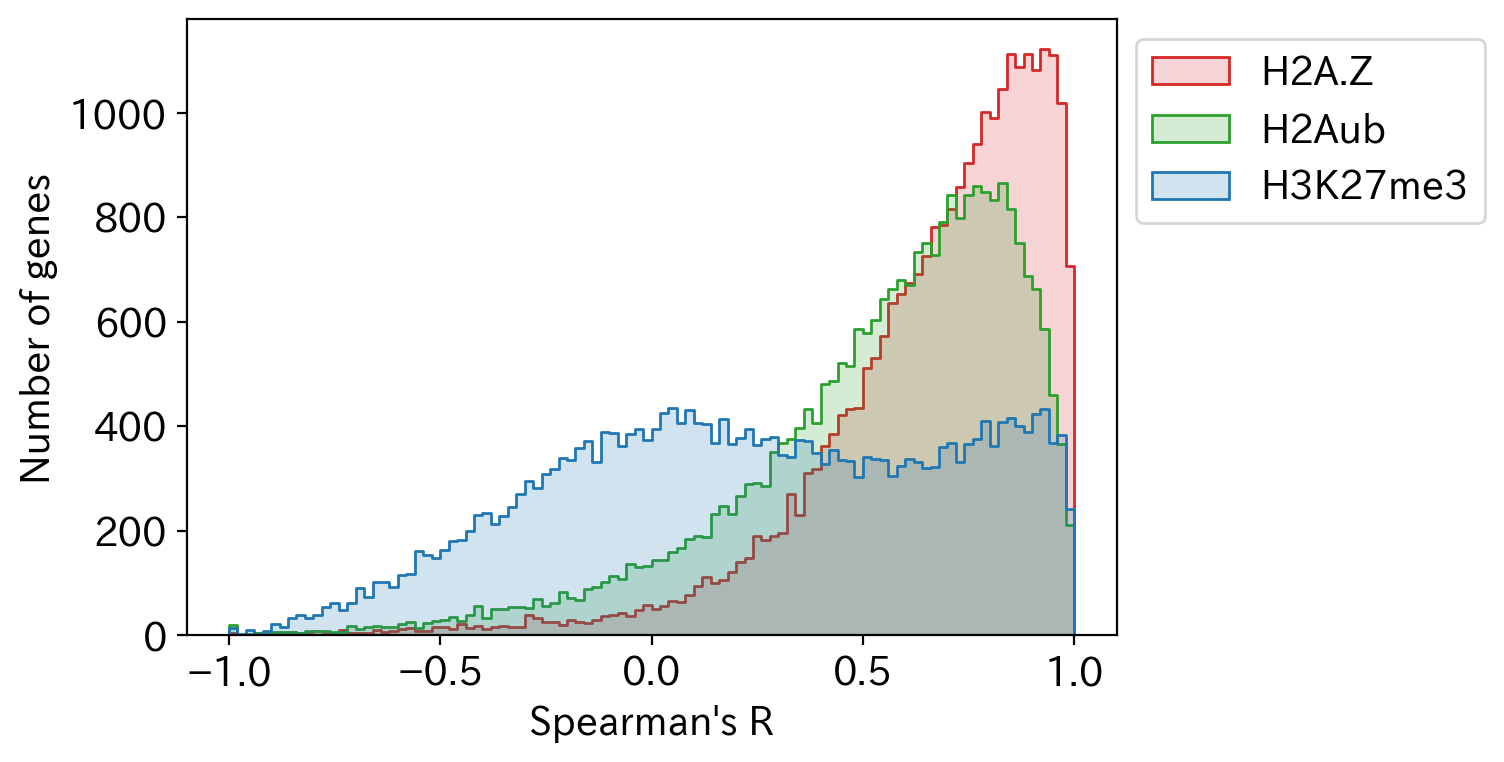

In [15]:
# Figure 1d
df_r = pd.read_csv(f"../data/Figure_1/spearmanr_per_genes.csv",
                    header=0)

hm_list = ["H2A.Z","H2Aub","H3K27me3"]
c_list = ["tab:red","tab:green","tab:blue"]

plt.figure(figsize=(6,4),dpi=200)

for i in range(3):
    hm1 = "H3K4me2"
    hm2 = hm_list[i]
    data = df_r[f"{hm1}-{hm2}"]

    # plot
    sns.histplot(data,bins=100,binrange=(-1,1),label=hm_list[i],
                 element="step",alpha=0.2,
                 color=c_list[i])

plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.xlabel("Spearman's R")
plt.ylabel("Number of genes")